In [3]:
import pandas as pd
import numpy as np


In [4]:
df=pd.read_csv('raw/dataset.csv')

In [5]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [7]:
 missing_values = df.isnull().sum()
 missing_values

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [8]:
df_clean=df.copy()
df_clean=df_clean.drop_duplicates()
df_clean=df_clean.dropna(subset=['artists','album_name','track_name'])
print(f"shape of the cleaned dataset: {df_clean.shape}")

shape of the cleaned dataset: (113999, 21)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns



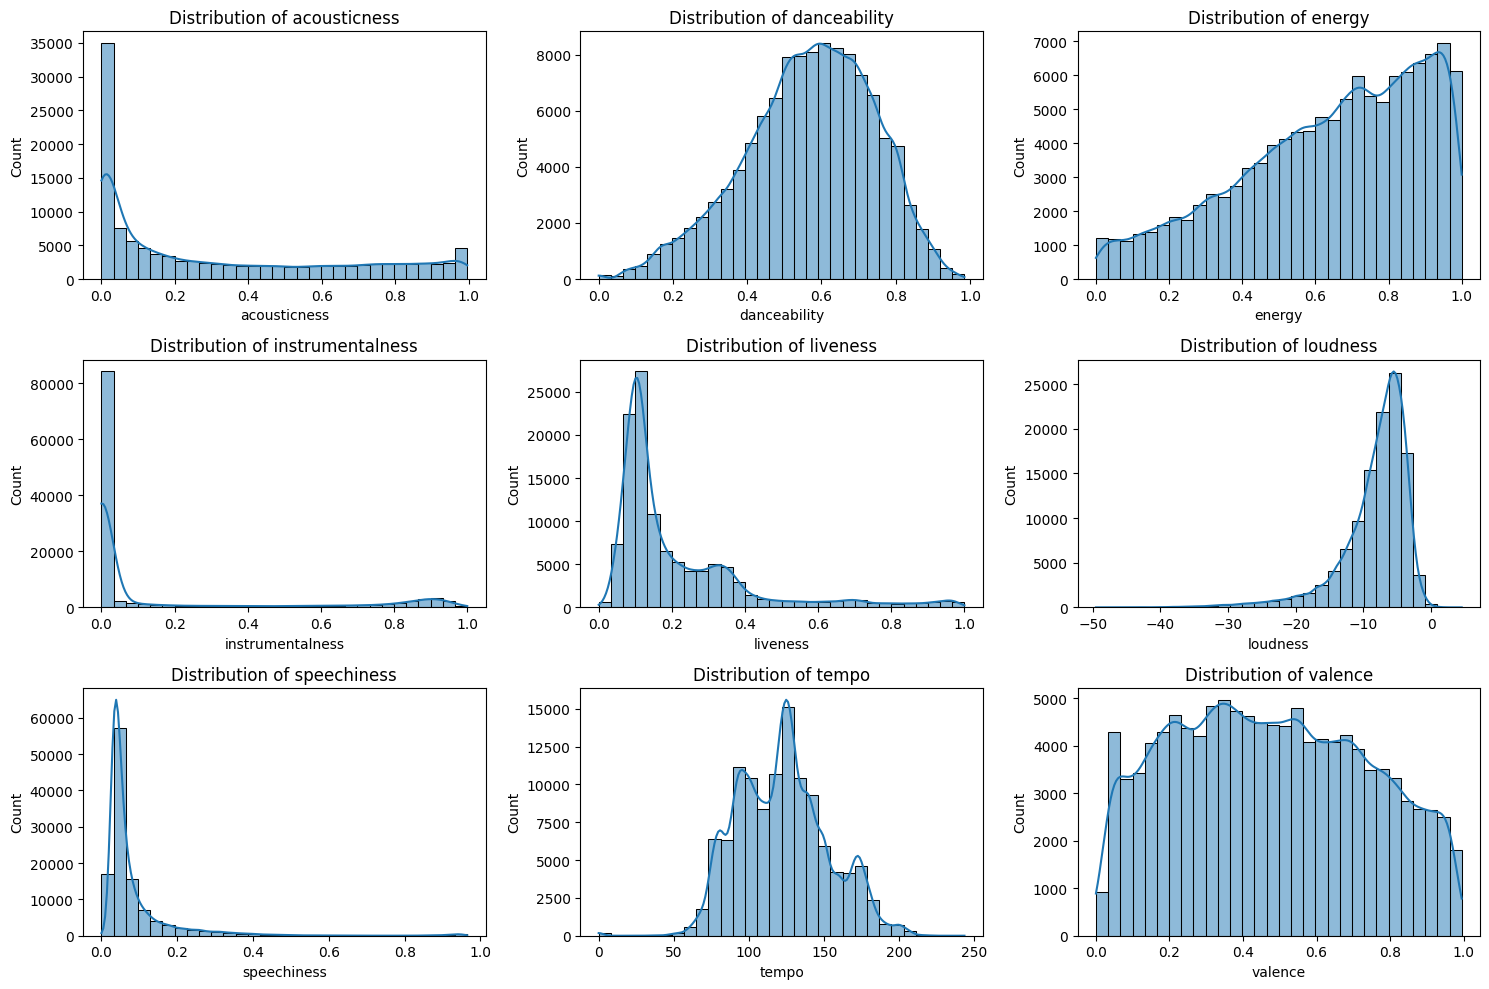

In [11]:
#plot distribution of key audio features
plt.figure(figsize=(15, 10))
features_to_plot = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
for i, feature in enumerate(features_to_plot):
    plt.subplot(3,3,i+1)
    sns.histplot(df_clean[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()    
        

In [12]:
from sklearn.preprocessing import MinMaxScaler

audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
df_normalized = df_clean.copy()
sclaler = MinMaxScaler()
df_normalized[audio_features] = sclaler.fit_transform(df_clean[audio_features])
df_normalized[['track_name'] + audio_features].head()


,track_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Comedy,0.032329,0.686294,0.4610,0.000001,0.3580,0.791392,0.148187,0.361245,0.718593
1,Ghost - Acoustic,0.927711,0.426396,0.1660,0.000006,0.1010,0.597377,0.079067,0.318397,0.268342
2,To Begin Again,0.210843,0.444670,0.3590,0.000000,0.1170,0.736123,0.057720,0.313643,0.120603
3,Can't Help Falling In Love,0.908635,0.270051,0.0596,0.000071,0.1320,0.573701,0.037617,0.746758,0.143719
4,Hold On,0.470884,0.627411,0.4430,0.000000,0.0829,0.737103,0.054508,0.492863,0.167839


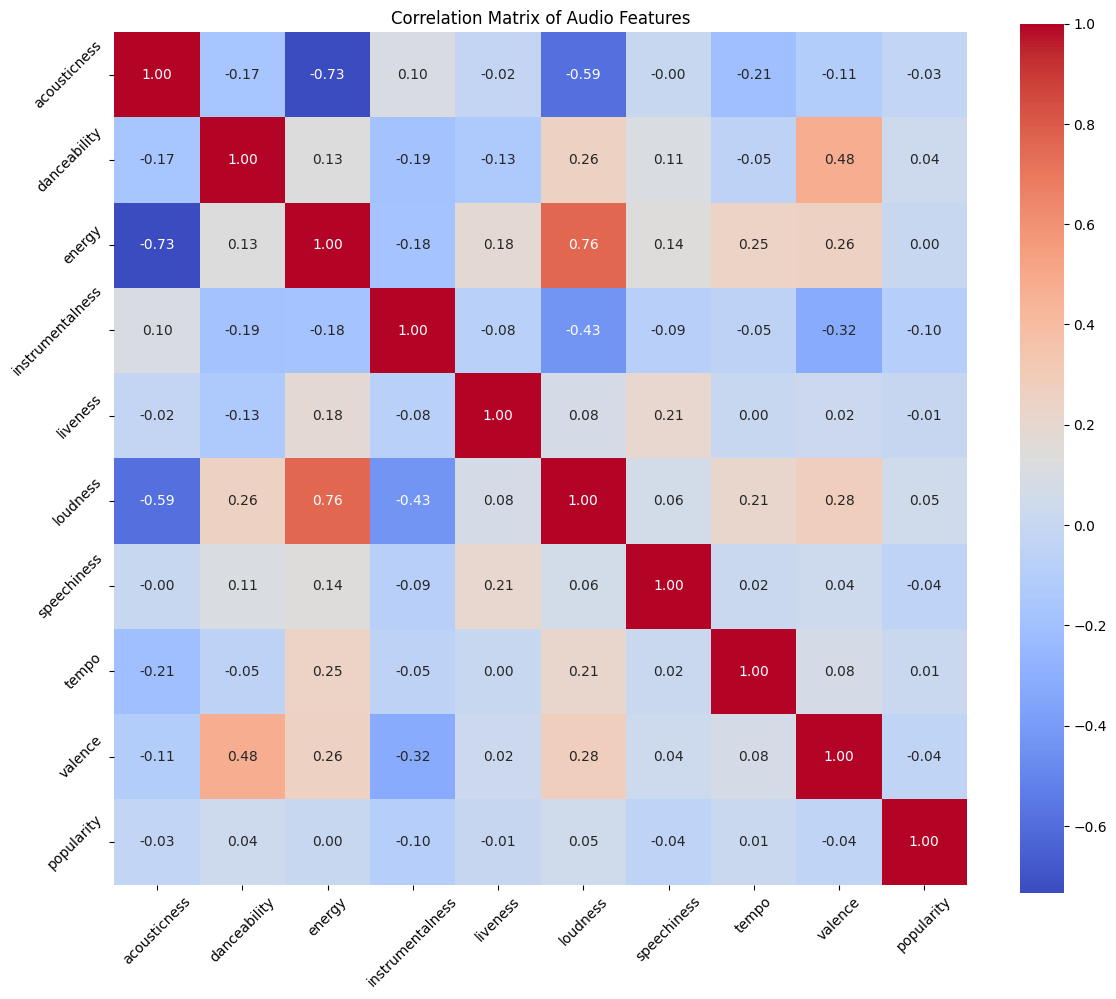

In [13]:
#feature correlation analysis
plt.figure(figsize=(12, 10))
corr=df_normalized[audio_features + ['popularity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Audio Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
#process genre data
#check if track_genre contains multiple genres per track
if 'track_genre' in df_normalized.columns:
    print(f"number of unique genres: {df_normalized['track_genre'].nunique()}")
    print(df_normalized['track_genre'].value_counts().head(10))
    if df_normalized['track_genre'].str.contains(',').any():
        from sklearn.preprocessing import MultiLabelBinarizer
        
        #split genres and one hot encode
        genres= df_normalized['track_genre'].str.split(',')
        mlb=MultiLabelBinarizer()
        genre_features =pd.DataFrame(
            mlb.fit_transform(genres),
            columns=mlb.classes_,
            index=df_normalized.index
        )
        genre_features.head()

number of unique genres: 114
track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
anime          1000
black-metal    1000
bluegrass      1000
blues          1000
brazil         1000
Name: count, dtype: int64


In [16]:
import os 
#create and save the final feature set
feature_columns = audio_features + ['key', 'mode', 'time_signature'] 

id_columns=['track_id', 'track_name', 'artists', 'album_name']
available_id_columns = [col for col in id_columns if col in df_normalized.columns]

feature_matrix = df_normalized[available_id_columns + feature_columns ]
feature_matrix.to_csv('processed/feature_matrix.csv', index=False)
print(f"Feature matrix saved with shape: {feature_matrix.shape}")


Feature matrix saved with shape: (113999, 16)


In [ ]:
#sample similarity analysis 
from sklearn.metrics.pairwise import cosine_similarity
# Add this to your last cell to test a smaller sample
# Test with a smaller subset to avoid memory errors
sample_size = 1000  # Adjust based on your available memory
sample_indices = np.random.choice(feature_matrix.shape[0], sample_size, replace=False)
sample_features = feature_matrix.iloc[sample_indices]

# Calculate similarity for the sample only
sample_numerical_features = sample_features[audio_features].values
sample_similarity_matrix = cosine_similarity(sample_numerical_features)

def _get_similar_songs(song_index,similarity_matrix, feature_matrix, top_n=5):
    #get similarity scores for the song 
    similarity_scores = list(enumerate(similarity_matrix[song_index]))
    similarity_scores=sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    #get top n similar songs
    similar_songs = similarity_scores[1:top_n+1]  # skip the first one as it is the song itself
    
    return [
        {
            'track_name': feature_matrix.iloc[i][available_id_columns[1]],
            'artists': feature_matrix.iloc[i][available_id_columns[2]],
            'similarity_score': similarity_scores[i][1]
        }
        for i, _ in similar_songs
    ]

In [21]:
# Test with a random song
import random
test_song_index = random.randint(0, 999)
test_song = feature_matrix.iloc[test_song_index]
print(f"Selected song: {test_song['track_name']} by {test_song['artists']}")

similar_songs = _get_similar_songs(test_song_index, sample_similarity_matrix, feature_matrix[:1000])
print("\nSimilar songs:")
for i, song in enumerate(similar_songs):
    print(f"{i+1}. {song['track_name']} by {song['artists']} (Similarity: {song['similarity_score']:.4f})")

Selected song: Near Or Far by Us The Duo

Similar songs:
1. DBS Out by Days N Daze (Similarity: 0.8698)
2. Such A Simple Thing by Ray LaMontagne (Similarity: 0.9189)
3. Stitches by Filip Nordin (Similarity: 0.8433)
4. What Would I Do Without You by Drew Holcomb & The Neighbors (Similarity: 0.9551)
5. Teenage Dream by The Rescues (Similarity: 0.9126)
